In [15]:
from util import *
from rbm import RestrictedBoltzmannMachine 
from dbn import DeepBeliefNet
import matplotlib.pyplot as plt

In [16]:
image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)
''' 
    network          : [top] <---> [pen] ---> [hid] ---> [vis] 
                               `-> [lbl] 
    lbl : label
    top : top
    pen : penultimate
    hid : hidden
    vis : visible
'''
"""
Args:
  sizes: Dictionary of layer names and dimensions
  image_size: Image dimension of data
  n_labels: Number of label categories
  batch_size: Size of mini-batch
"""
lbl=10
top=2000
pen=500
hid=500
vis=28*28
sizes={"lbl":lbl,"top":top,"pen":pen,"hid":hid,"vis":vis}
batch_size = 32
n_labels = lbl

In [17]:
#crete a DBN

dbn = DeepBeliefNet(sizes=sizes,image_size=image_size,n_labels=n_labels,batch_size=batch_size)


In [18]:
#train the dbn
n_iterations =10
dbn.train_greedylayerwise(vis_trainset=train_imgs,lbl_trainset=train_lbls,n_iterations=n_iterations)

training vis--hid
learning CD1
iteration=      0 recon_loss=46.0575
iteration=      1 recon_loss=44.4501
iteration=      2 recon_loss=44.3512
iteration=      3 recon_loss=44.0690
iteration=      4 recon_loss=43.7140
iteration=      5 recon_loss=43.5212
iteration=      6 recon_loss=44.1441
iteration=      7 recon_loss=43.7472
iteration=      8 recon_loss=43.3947
iteration=      9 recon_loss=43.8650
training hid--pen
learning CD1
iteration=      0 recon_loss=8.3654
iteration=      1 recon_loss=6.7534
iteration=      2 recon_loss=5.7963
iteration=      3 recon_loss=5.3435
iteration=      4 recon_loss=4.8814
iteration=      5 recon_loss=4.6559
iteration=      6 recon_loss=4.3784
iteration=      7 recon_loss=4.2273
iteration=      8 recon_loss=4.0183
iteration=      9 recon_loss=3.7989
training pen+lbl--top
learning CD1
iteration=      0 recon_loss=288.6026
iteration=      1 recon_loss=288.5725
iteration=      2 recon_loss=289.1702
iteration=      3 recon_loss=289.1702
iteration=      4 rec

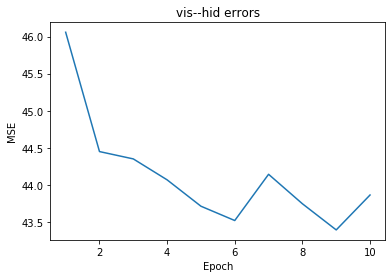

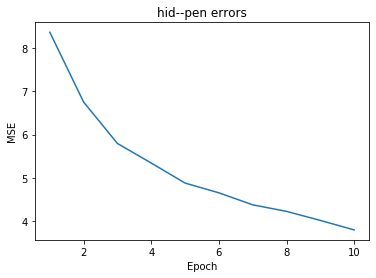

In [19]:
#show the errors of first two RBMs
x=[i+1 for i in range(n_iterations)]
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(x,dbn.vis_hid_errors)
plt.title("vis--hid errors")
plt.show()
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(x,dbn.hid_pen_errors)
plt.title("hid--pen errors")
plt.show()

In [20]:
dbn.recognize(test_imgs,test_lbls)

drive the network bottom to top
vis--hid
hid--pen
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
accuracy = 10.10%


In [21]:
print(dbn.label_log)




[array([3, 3, 3, ..., 3, 3, 3]), array([3, 3, 3, ..., 3, 3, 3]), array([3, 3, 3, ..., 3, 3, 3]), array([3, 3, 3, ..., 3, 3, 3]), array([3, 3, 3, ..., 3, 3, 3]), array([3, 3, 3, ..., 3, 3, 3]), array([3, 3, 3, ..., 3, 3, 3]), array([3, 3, 3, ..., 3, 3, 3]), array([3, 3, 3, ..., 3, 3, 3]), array([3, 3, 3, ..., 3, 3, 3]), array([3, 3, 3, ..., 3, 3, 3]), array([3, 3, 3, ..., 3, 3, 3]), array([3, 3, 3, ..., 3, 3, 3]), array([3, 3, 3, ..., 3, 3, 3]), array([3, 3, 3, ..., 3, 3, 3])]
